# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

The data represents 17 marketing campaigns occured between May 2008 and Nov 2010, corresponding to a total of 79354 contacts.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [289]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "notebook"
import time
import warnings
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.compose import make_column_transformer
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV


# Ignore warnings
warnings.filterwarnings('ignore')

In [290]:
#Collect Initial Data
df = pd.read_csv('../data/bank-additional-full.csv', sep = ';')


In [291]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [292]:
df.shape

(41188, 21)

### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

### Business Understanding
From a business perspective, we are tasked to compare the classifiers, K-Nearest Neighbors, Logistic Regression, Decision Trees, and Support Vector Machines to predict the outcome of a bank promotions campaign against individuals.
1. Determine Business Objectives
    * Background: The  dataset [../data/bank-additional-full.csv) contains Portugese banking institution and is a collection of the results of multiple marketing campaigns.

    * Business Objectives:  The goal is to build a predictive model that can label a data item into one of several predefined classes (e.g. “yes”, “no”) using various classification data minning approaches. 

    * Business Success Criteria: Provide a report on explored classification, models and anlysis of results to determine if the client subscribed a term deposit


2. Assess the Situation
    * Inventory of Resources: Assignment files "practical-application-3" containing starter Jupiter notebook, three dataset [dataset](../data),  accompanying article CRISP-DM-BANK.pdf for more information on the data and features and how the campaign were carried out
    * Requirements, Assumptions, and Constraints: Provide a report on explored classification, models and anlysis . The assumption is that as the dataset is from the public database  UCI Machine Learning repository it's acceptable to use it in a practical assignment. 

    * Risks and Contingencies terminology: The success will depend on my understanding of topics covered up to module 17, the data processing is done on the dataset, and the modal/modals I selected as a part of my solution.

    * Costs and Benefits: The derived modal will help my client, to access the classifier performance, classification metrics, such as accuracy rate or ROC curve, Lift curve.

3. Determine Data Mining Goals
    * Data Mining Goals： shows the predictive results for the test data during the three CRISP-DM iterations of classification models

    * Data Mining Success Criteria： Build a predictive model that can label a data item into one of several predefined classes (e.g. “yes”, “no”). Several DM algorithms can be used for classifying marketing contacts, each one with its own purposes and capabilities
4. Produce Project Plan
    * Project Plan： CRISP-DM is used in the project as a cyclic process, where several iterations can be used to allow final result more tuned towards the business goals.
    * Initial Assessment of Tools and Techniques： Jupiter Notebook is used as a computational documents tool for this assignment. The programming language used is Python, and the libraries used are: Pandas, Plotly, Seaborn, Matplotlib,  Numpy , Sklearn

### Data Understanding

After considering the business understanding, I explored dataset to understand the data columns and data contained in each column and identify any quality issues. 
Data Understanding

##### Collect Initial Data
The data represents 17 marketing campaigns occured between May 2008 and Nov 2010, corresponding to a total of 79354 contacts.

##### Describe Data
Data Description report: 
* There are 5 int64 columns,5  float64 columns, and 10 object columns. 
* The bank-additional.csv'.csv dataset contains following attributes:
Attribute Information:
Input variables:

bank client data: 
* age (numeric)
* job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
* default: has credit in default? (categorical: 'no','yes','unknown')
*  housing: has housing loan? (categorical: 'no','yes','unknown')
*  loan: has personal loan? (categorical: 'no','yes','unknown')

related with the last contact of the current campaign:
* contact: contact communication type (categorical: 'cellular','telephone')
* month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
*  day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
*  duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

other attributes:
*  campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
*  previous: number of contacts performed before this campaign and for this client (numeric)
*  poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

social and economic context attributes
* emp.var.rate: employment variation rate - quarterly indicator (numeric)
* cons.price.idx: consumer price index - monthly indicator (numeric)
* cons.conf.idx: consumer confidence index - monthly indicator (numeric)
* euribor3m: euribor 3 month rate - daily indicator (numeric)
* nr.employed: number of employees - quarterly indicator (numeric)



Output variable (desired target):
*  y - has the client subscribed a term deposit? (binary: 'yes','no')



In [293]:
# Describe data
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

(41188, 21)

###  Explore & Verify data 
The dataset dosen't contain null values
1. Check for Null values: No null values found 
2. Determine the unique values for each columns

In [294]:
# Describe data
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [295]:
# Describe data
df.describe(include = ['object'])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [296]:
# Describe data
df.describe().astype(np.int64)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
mean,40,258,2,962,0,0,93,-40,3,5167
std,10,259,2,186,0,1,0,4,1,72
min,17,0,1,0,0,-3,92,-50,0,4963
25%,32,102,1,999,0,-1,93,-42,1,5099
50%,38,180,2,999,0,1,93,-41,4,5191
75%,47,319,3,999,0,1,93,-36,4,5228
max,98,4918,56,999,7,1,94,-26,5,5228


In [297]:
#Explore and verify data
# Checking for nulls
df.isnull().sum(axis = 1)
#Result N

0        0
1        0
2        0
3        0
4        0
        ..
41183    0
41184    0
41185    0
41186    0
41187    0
Length: 41188, dtype: int64

In [298]:
#Explore and Verify unique data in column
df_unique = df.nunique().to_frame().reset_index()
df_unique.columns = ['Variable','DistinctCount']
print(df_unique)

          Variable  DistinctCount
0              age             78
1              job             12
2          marital              4
3        education              8
4          default              3
5          housing              3
6             loan              3
7          contact              2
8            month             10
9      day_of_week              5
10        duration           1544
11        campaign             42
12           pdays             27
13        previous              8
14        poutcome              3
15    emp.var.rate             10
16  cons.price.idx             26
17   cons.conf.idx             26
18       euribor3m            316
19     nr.employed             11
20               y              2


In [299]:
#Explore and verify data
#Print unique values for each column¶
category_features = df.select_dtypes(include=['object', 'bool']).columns.values

for col in category_features:
    print(col, "(", len(df[col].unique()) , "values):\n", np.sort(df[col].unique()))

job ( 12 values):
 ['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']
marital ( 4 values):
 ['divorced' 'married' 'single' 'unknown']
education ( 8 values):
 ['basic.4y' 'basic.6y' 'basic.9y' 'high.school' 'illiterate'
 'professional.course' 'university.degree' 'unknown']
default ( 3 values):
 ['no' 'unknown' 'yes']
housing ( 3 values):
 ['no' 'unknown' 'yes']
loan ( 3 values):
 ['no' 'unknown' 'yes']
contact ( 2 values):
 ['cellular' 'telephone']
month ( 10 values):
 ['apr' 'aug' 'dec' 'jul' 'jun' 'mar' 'may' 'nov' 'oct' 'sep']
day_of_week ( 5 values):
 ['fri' 'mon' 'thu' 'tue' 'wed']
poutcome ( 3 values):
 ['failure' 'nonexistent' 'success']
y ( 2 values):
 ['no' 'yes']


In [300]:
#Explore and verify data
for col in category_features:
    print(f"\033[1m\033[94m{col} \n{20 * '-'}\033[0m")    
    print(df[col].value_counts(), "\n")
    
print(df.nunique(axis=1))

job 
--------------------
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64 

marital 
--------------------
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64 

education 
--------------------
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64 

default 
--------------------
no         32588
unknown     8597
yes            3
Name: default, dtype: int64 

housing 
--------------------
yes        21576
no         18622
unknown      990
Name: housing, dtype: int64 

loan 
----------------

Data Visulization

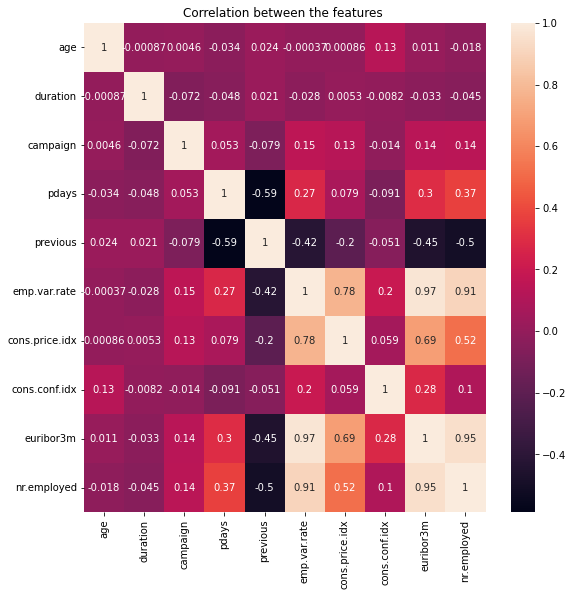

In [301]:
#Describe data and visualize it
df.corr()
plt.figure(figsize=(9,9))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation between the features ')
plt.savefig("images/feature_corr")
plt.show()

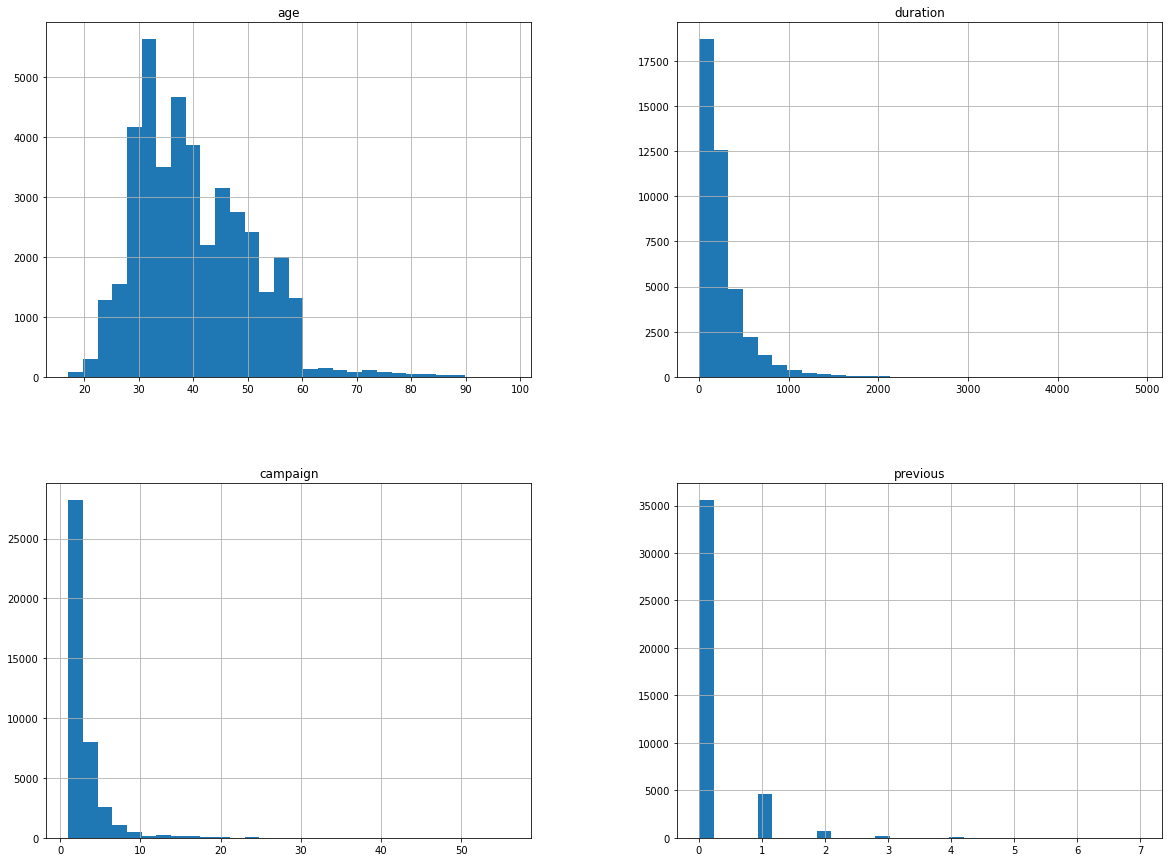

In [302]:
 #Describe data and visualize it
 #visualize distributions of numerical features with histograms
 df[['age','duration','campaign','previous']].hist(bins=30, figsize=(20,15))
plt.savefig("images/attribute_histogram_plots")
plt.show()

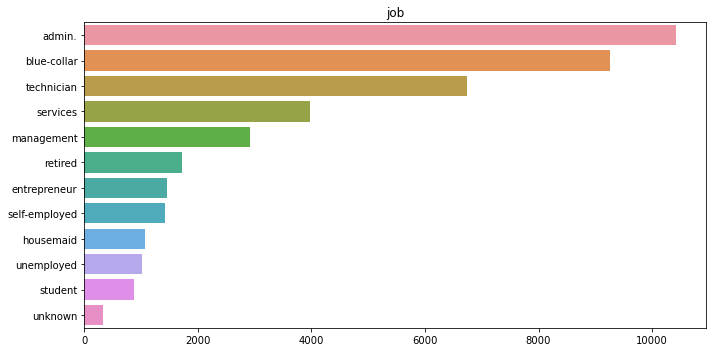

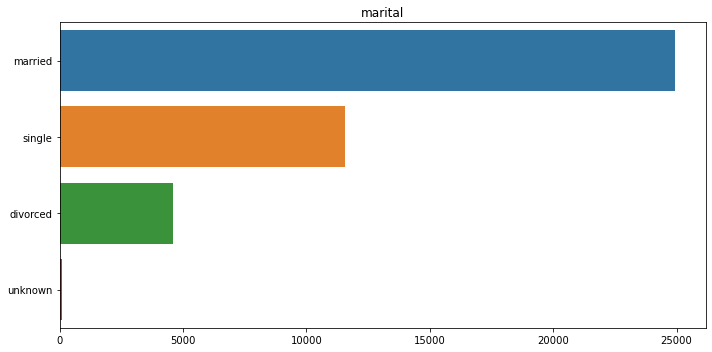

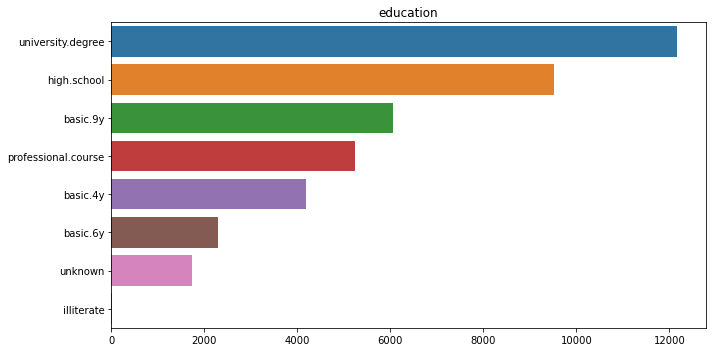

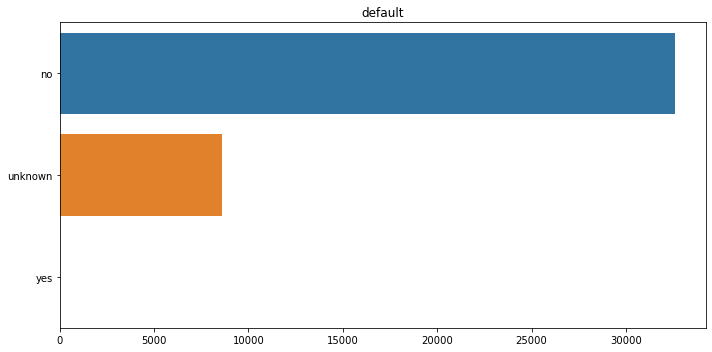

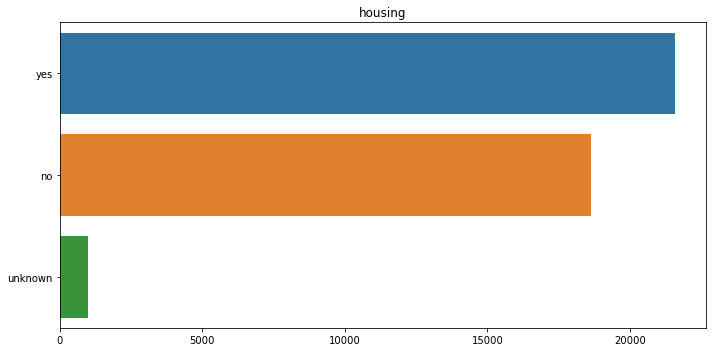

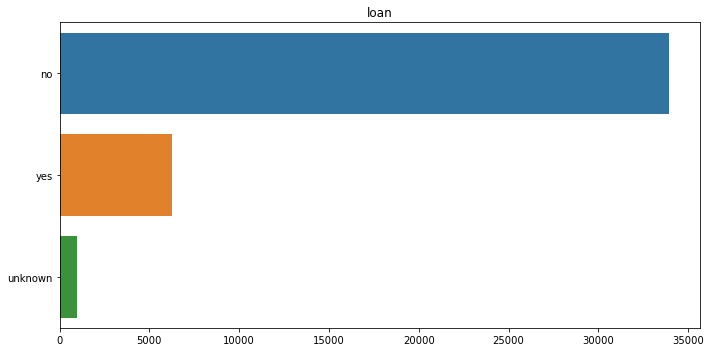

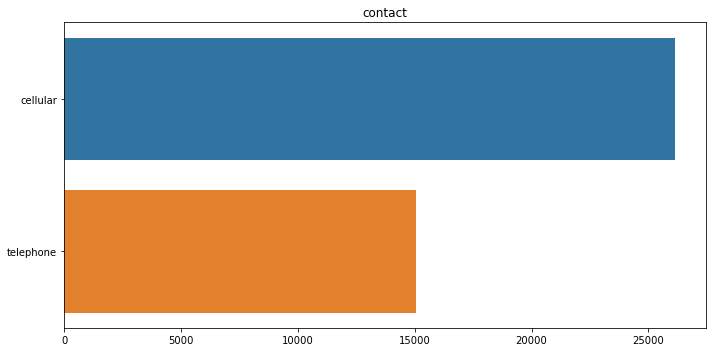

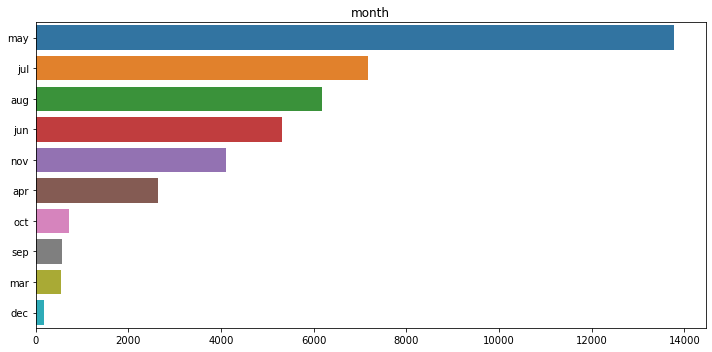

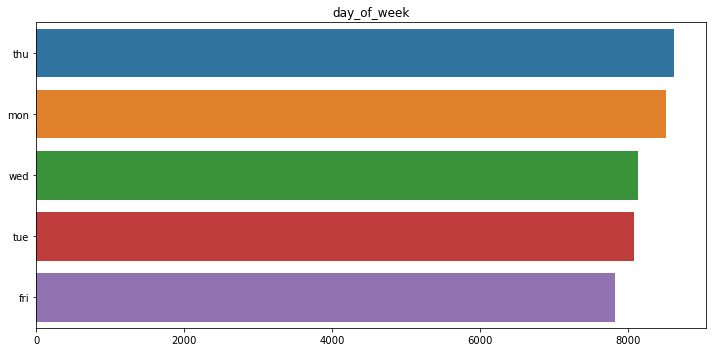

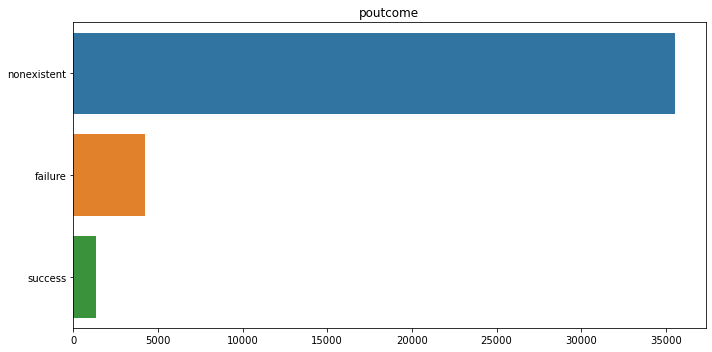

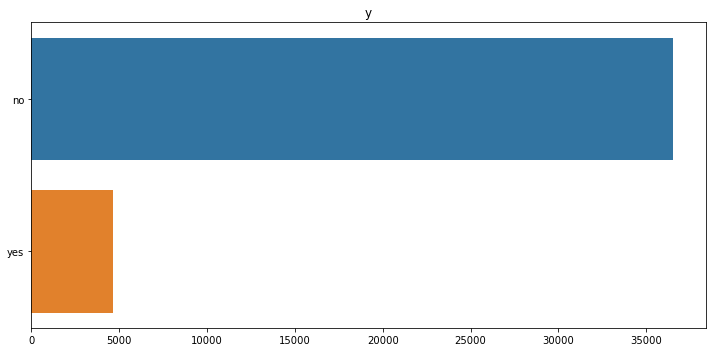

In [303]:
# Visualize categorical features of the dataset
for col in category_features:
    plt.figure(figsize=(10,5))    
    sns.barplot(df[col].value_counts().values, df[col].value_counts().index, data=df)    
    plt.title(col)    
    plt.tight_layout()
    plt.savefig("images/"+col)

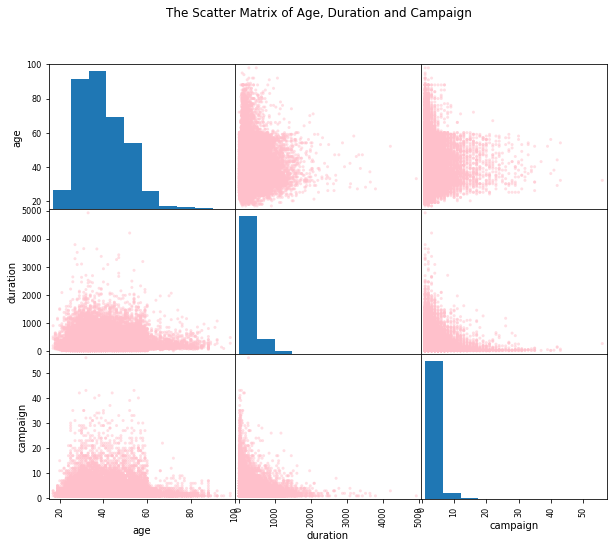

In [304]:
import pandas as pd
#Scatter matrix and Correlation matrix¶

sc_matrix = pd.plotting.scatter_matrix(df[['age','duration','campaign']],figsize=(10,8),color="pink")

plt.suptitle('The Scatter Matrix of Age, Duration and Campaign')
plt.savefig("images/age_dur_camp")
plt.show()

Inference:

* Job: Administrators, blue-collars, and technicians are mostly targeted by the campaigns.
* Marital status: The campaigns target mostly married people as they are more likely to do term deposit.
* Education: Education play a key role, more the education its more likley the client will do term deposits
* default/credit: Most people have no default stay on their credit file.
* housing an loan: People who own house and has loan are less likely to go for term deposits
* contact: Best way to reach clinet is cellular .
* month - May is the busy month reason could be due to sunny wether. December is the least busy month, because of the holidays season.
* day of week: Thursday is the most busy day while Friday is the least busy day of the week as client are getting ready for the weekend hence don't want to consider term deposit.

### Data Preparation

After my initial exploration and fine tuning of the business understanding, it is time to construct my final dataset prior to modeling

In [305]:

# Change column name: 'y' to 'response'
df.rename(index=str, columns={'y': 'response'}, inplace = True)
def convert(df1, new_column, old_column):
    df1[new_column] = df1[old_column].apply(lambda x: 0 if x == 'no' else 1)
    return df[new_column].value_counts()

convert(df, "response_binary", "response")
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response,response_binary
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,1


 ### Data Filtering

In [306]:
#Drop column "contact" as its not usefull
df1 = df.drop('contact', axis=1)
#Change the unit of 'duration' from seconds to minutes
df1['duration'] = df1['duration'].apply(lambda n:n/60).round(2)



In [307]:
#Drop rows that 'duration' < 5s
duration_condition = (df1['duration']<5/60)
df2 = df1.drop(df1[duration_condition].index, axis = 0, inplace = False)
df2.shape
df2

,age,job,marital,education,default,housing,loan,month,day_of_week,duration,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response,response_binary
0,56,housemaid,married,basic.4y,no,no,no,may,mon,4.35,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,may,mon,2.48,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,may,mon,3.77,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,may,mon,2.52,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,may,mon,5.12,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,nov,fri,5.57,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,1
41184,46,blue-collar,married,professional.course,no,no,no,nov,fri,6.38,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,0
41185,56,retired,married,university.degree,no,yes,no,nov,fri,3.15,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,0
41186,44,technician,married,professional.course,no,no,no,nov,fri,7.37,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,1


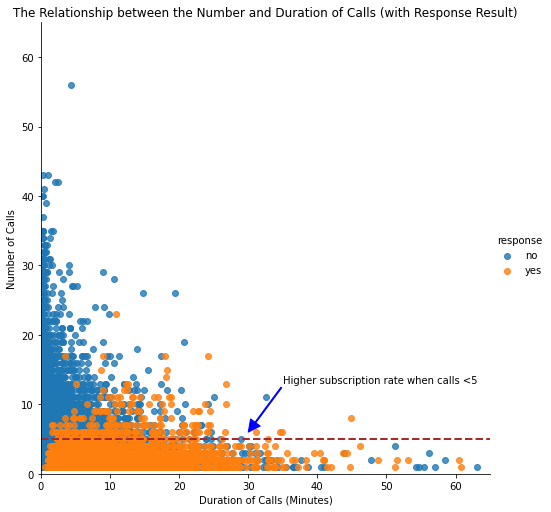

In [308]:
#Visualize the relationship between 'duration' & 'campaign': with response result
duration_distance_plot_res = sns.lmplot(x='duration', y='campaign',data = df2,
                     hue = 'response',
                     fit_reg = False,
                     scatter_kws={'alpha':0.8,}, height =7)

plt.axis([0,65,0,65])
plt.ylabel('Number of Calls')
plt.xlabel('Duration of Calls (Minutes)')
plt.title('The Relationship between the Number and Duration of Calls (with Response Result)')

# Annotation
plt.axhline(y=5, linewidth=2, color="brown", linestyle='--')
plt.annotate('Higher subscription rate when calls <5',xytext = (35,13),
             arrowprops=dict(color = 'blue', width=1),xy=(30,6))
plt.savefig("images/call_duration")
plt.show()


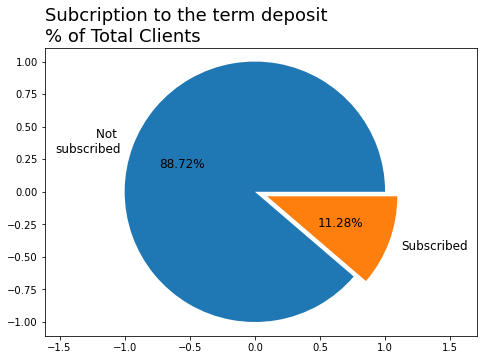

In [309]:
# Visualize of data for subscription to term deposit
labels = ["Not \nsubscribed", "Subscribed"]
explode = (0, 0.1)  # only "explode" the second slice (i.e. 'Subscribed')

# depicting the visualization 
fig = plt.figure() 
ax = fig.add_axes([0,0,1,1]) 

ax.pie(df2['response'].value_counts(), 
       labels = labels,
       explode = explode,
       autopct ='%1.2f%%',
       frame = True,
       textprops = dict(color ="black", size=12)) 

ax.axis('equal') 
plt.title('Subcription to the term deposit\n% of Total Clients',
     loc='left',
     color = 'black', 
     fontsize = '18')
plt.savefig("images/piechart")

plt.show()

Visualize the target audience and identify customers which were more likely to subscribe to the term deposit.

In [310]:
table = pd.crosstab(df2['job'], df2['response_binary'])
table = round(table.div(table.sum(axis=1), axis=0).mul(100), 2)
table.columns=['notsubcribed', 'subcribed']
table.sort_values(by=['subcribed'], ascending=False).loc[:, 'subcribed']



job
student          31.50
retired          25.25
unemployed       14.22
admin.           12.99
management       11.23
unknown          11.21
technician       10.84
self-employed    10.51
housemaid        10.00
entrepreneur      8.53
services          8.15
blue-collar       6.91
Name: subcribed, dtype: float64

<Figure size 1152x576 with 0 Axes>

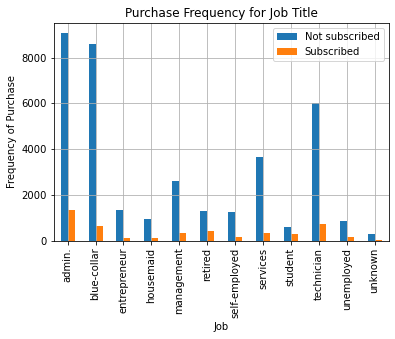

In [311]:
plt.figure(figsize=(16,8))
table = pd.crosstab(df2['job'], df2['response'])
table.columns = ['Not subscribed', 'Subscribed']
table.plot(kind='bar')

plt.grid(True)

plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig("images/purchase_vs_job")

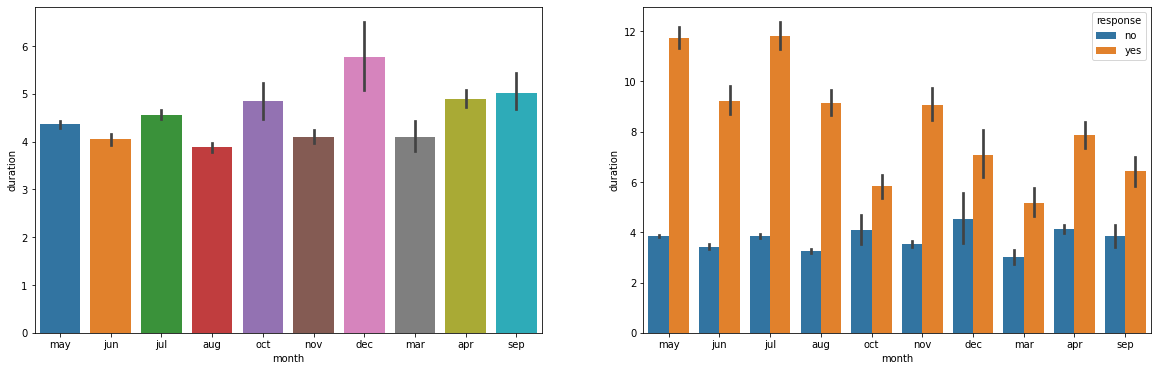

In [312]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.barplot(x='month',y='duration' , data=df2)
plt.subplot(1,2,2)
sns.barplot(x='month',y='duration', hue='response', data=df2)
plt.savefig("images/month")



Inferece
Longer calls were need during sping, fall and during decemner indicating Holiday period were customer is more unlikly to do term deposit

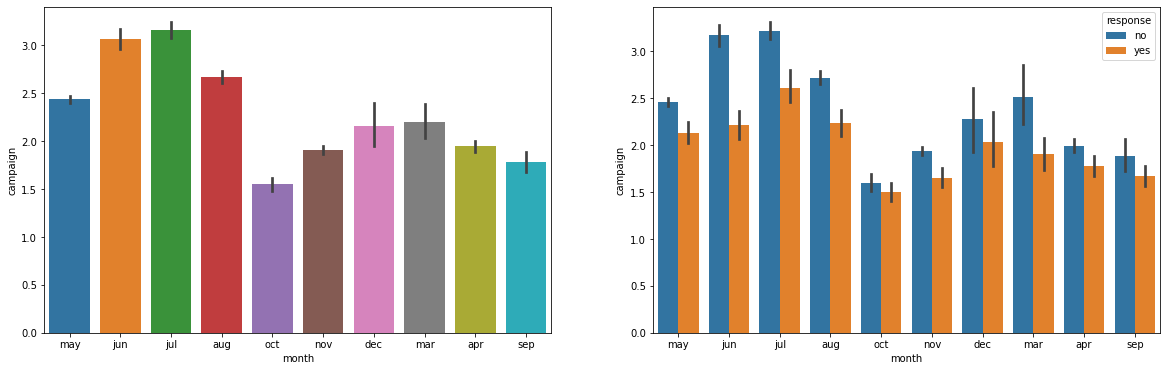

In [313]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.barplot(x='month',y='campaign' , data=df2)
plt.subplot(1,2,2)
sns.barplot(x='month',y='campaign', hue='response', data=df2)
plt.savefig("images/month_camp")


Inference
The campaign was more effective during summer months and dipped during other spring and fall holidays

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

Data Transformations and Classification

In [314]:
cols = ['marital','default', 'housing', 'loan', 'poutcome','job','education','month','response','day_of_week']
#
# Encode labels of multiple columns at once
#
df2[cols] = df2[cols].apply(LabelEncoder().fit_transform)
#
# Print head
#
df2.head()

data=df2
data

,age,job,marital,education,default,housing,loan,month,day_of_week,duration,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response,response_binary
0,56,3,1,0,0,0,0,6,1,4.35,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,0
1,57,7,1,3,1,0,0,6,1,2.48,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,0
2,37,7,1,3,0,2,0,6,1,3.77,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,0
3,40,0,1,1,0,0,0,6,1,2.52,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,0
4,56,7,1,3,0,0,2,6,1,5.12,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,2,0,7,0,5.57,...,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1,1
41184,46,1,1,5,0,0,0,7,0,6.38,...,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0,0
41185,56,5,1,6,0,2,0,7,0,3.15,...,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0,0
41186,44,9,1,5,0,0,0,7,0,7.37,...,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1,1


In [315]:
selected_features = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'duration','campaign', 'previous', 'poutcome']
X = data[selected_features]
y = data['response_binary']


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [316]:
#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 22)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, stratify = y, random_state=22)
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)


Number transactions X_train dataset:  (28794, 11)
Number transactions y_train dataset:  (28794,)
Number transactions X_test dataset:  (12341, 11)
Number transactions y_test dataset:  (12341,)


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

Using dummy classifier as Baseline model as it's  a type of classifier which does not generate any insight about the data and classifies the given data using only simple rules. The classifier’s behavior is completely independent of the training data as the trends in the training data are completely ignored and instead uses one of the strategies to predict the class label.
Below are a few strategies used by the dummy classifier to predict a class label –
* Most Frequent: The classifier always predicts the most frequent class label in the training data.
* Stratified: It generates predictions by respecting the class distribution of the training data. It is different from the “most frequent” strategy as it instead associates a probability with each data point of being the most frequent class label.
* Uniform: It generates predictions uniformly at random.
* Constant: The classifier always predicts a constant label and is primarily used when classifying non-majority class labels.

In [317]:
# Instantiate a dummy classifier that always predicts the majority class
strategies = ['most_frequent', 'stratified', 'uniform']
  
test_scores = []
for s in strategies:
    
    dummy = DummyClassifier(strategy = s)
  
    # Fit the classifier on the training data
    dummy.fit(X_train, y_train)

    # Evaluate the classifier on the test data
    accuracy = dummy.score(X_test, y_test)
    print("Strategies",s)
    # Print the baseline accuracy
    print("Baseline accuracy: {:.2f}".format(accuracy))
    

Strategies most_frequent
Baseline accuracy: 0.89
Strategies stratified
Baseline accuracy: 0.80
Strategies uniform
Baseline accuracy: 0.49


### Modeling

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

Define the storage dataframe.

In [318]:
# Initialize an empty DataFrame to store the results
results_df = pd.DataFrame(columns=['Name', 'Train Time', 'Train Accuracy', 'Test Accuracy'])

In [319]:
%%time
# Define the search space for Logistic Regression
log_reg_params = {'solver': ['liblinear', 'lbfgs'], 'penalty': ['l1', 'l2'], 'C': [0.1, 1, 10, 100], 'class_weight': [None, 'balanced']}
log_reg_model=""
# Grid search for Logistic Regression
log_reg_model = GridSearchCV(LogisticRegression(), log_reg_params, cv=5)
log_reg_model.fit(X_train, y_train)

log_reg_best_params = log_reg_model.best_params_


# Evaluate the logistic regression model on the train data
train_accuracy = log_reg_model.score(X_train, y_train)
test_accuracy = log_reg_model.score(X_test, y_test)
# Print the train  accuracy
print("Train accuracy: {:.2f}".format(train_accuracy))

print("Test accuracy: {:.2f}".format(test_accuracy))

Train accuracy: 0.90
Test accuracy: 0.90
CPU times: total: 1min 52s
Wall time: 21.5 s


In [320]:
%%time
# Selected parameters assignement
log_reg_params = {'C': 0.1, 'class_weight': None, 'penalty': 'l1', 'solver': 'liblinear'}
start_time = time.time()
log_reg_model= LogisticRegression(**log_reg_params)
log_reg_model.fit(X_train,y_train)
end_time = time.time()
train_time = end_time - start_time
# Evaluate the logistic regression model on the train data
train_accuracy = log_reg_model.score(X_train, y_train)
test_accuracy = log_reg_model.score(X_test, y_test)

log_reg_model_result = pd.DataFrame({'Name': ['Logistic Regression'], 'Train Time': [train_time], 'Train Accuracy': [train_accuracy], 'Test Accuracy': [test_accuracy]})
results_df = pd.concat([results_df, log_reg_model_result])
# Print the train  accuracy
print("Train accuracy: {:.2f}".format(train_accuracy))
print("Test accuracy: {:.2f}".format(test_accuracy))

Train accuracy: 0.90
Test accuracy: 0.90
CPU times: total: 1.02 s
Wall time: 251 ms


Inference: Evem with different LogisticRegression parameter I got same accuracy of 0.90

### Problem 9: Score the Model

What is the accuracy of your model?

#### Logistic Regression Model

In [321]:
# Evaluate the logistic regression model on the test data for solver='sag',max_iter=10000
accuracy = log_reg_model.score(X_test, y_test)

# Print the test accuracy
print("Test accuracy: {:.2f}".format(accuracy))


# Evaluate the logistic regression model on the test data solver='liblinear'
accuracy = log_reg_model.score(X_test, y_test)

# Print the test accuracy
print("Test accuracy: {:.2f}".format(accuracy))

Test accuracy: 0.90
Test accuracy: 0.90


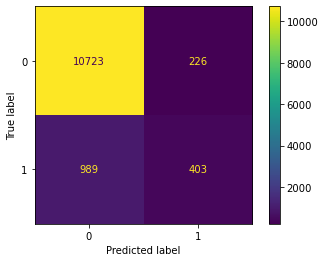

In [322]:
# Make predictions on the test data for LogRegModel
y_pred = log_reg_model.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a confusion matrix display
cmd = ConfusionMatrixDisplay(cm, display_labels=log_reg_model.classes_)

# Plot the confusion matrix
cmd.plot()

In [323]:
# Make predictions on the test data
y_pred = log_reg_model.predict(X_test)


# Calculate the precision, recall, and F1 score
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)

# Print the performance metrics
print("Precision: {:.3f}".format(precision))
print("Recall: {:.3f}".format(recall))
print("F1 Score: {:.3f}".format(f1))

# Print the test accuracy
print("Test accuracy: {:.2f}".format(accuracy))

Precision: 0.641
Recall: 0.290
F1 Score: 0.399
Test accuracy: 0.90


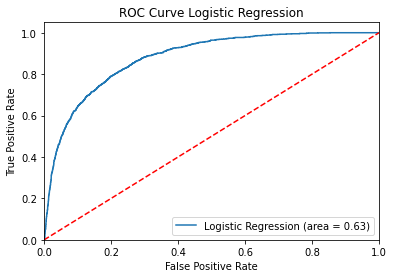

Logistic Regression AUC Score: 0.88


In [324]:
#AUC ROC curve  for LogRegModel
logit_roc_auc = roc_auc_score(y_test,y_pred)
fpr, tpr, thresholds = roc_curve(y_test, log_reg_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Logistic Regression')
plt.legend(loc="lower right")
plt.savefig('images/Log_ROC_Logistic Regression')
plt.show()
auc_score =roc_auc_score(y_test, log_reg_model.predict_proba(X_test)[:,1])
print("Logistic Regression AUC Score: {:.2f}".format(auc_score))

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:



In [325]:
# prepare configuration for cross validation test harness
seed = 7
cv_results =[]
# prepare models
models = []
# Model parameters
log_reg_params = {'solver': 'liblinear', 'C': 1.0, 'penalty': 'l2', 'class_weight': 'balanced'}
dec_tree_params = {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2, 'min_samples_leaf': 1}
knn_params = {'n_neighbors': 5, 'weights': 'uniform', 'algorithm': 'auto', 'leaf_size': 30}
svm_params = {'C': 1.0, 'kernel': 'rbf', 'degree': 3, 'gamma': 'scale', 'class_weight': 'balanced'}

In [326]:
%%time
# Fit the LogisticRegression models
log_reg = LogisticRegression(**log_reg_params)
log_reg.fit(X_train, y_train)
y_pred =log_reg.predict(X_test)
# computing and plotting confusion matrix
c_m = confusion_matrix(y_test, y_pred)
print('LogisticRegression:\n confusion matrix\n', c_m,'\n\n')
models.append(('LogisticRegression',log_reg))

LogisticRegression:
 confusion matrix
 [[9227 1722]
 [ 371 1021]] 


CPU times: total: 172 ms
Wall time: 158 ms


In [327]:
%%time
# Fit the DecisionTreeClassifier models
dec_tree = DecisionTreeClassifier(**dec_tree_params)
dec_tree.fit(X_train, y_train)
y_pred =dec_tree.predict(X_test)
# computing and plotting confusion matrix
c_m = confusion_matrix(y_test, y_pred)
print('DecisionTreeClassifier:\n confusion matrix\n', c_m,'\n\n')
models.append(('DecisionTreeClassifier',dec_tree))

DecisionTreeClassifier:
 confusion matrix
 [[10684   265]
 [  918   474]] 


CPU times: total: 219 ms
Wall time: 41 ms


In [328]:
%%time
# Fit the KNeighborsClassifier models
knn = KNeighborsClassifier(**knn_params)
knn.fit(X_train, y_train)
y_pred =knn.predict(X_test)
# computing and plotting confusion matrix
c_m = confusion_matrix(y_test, y_pred)
print('KNeighborsClassifier:\n confusion matrix\n', c_m,'\n\n')
models.append(('KNeighborsClassifier',knn))

KNeighborsClassifier:
 confusion matrix
 [[10608   341]
 [  996   396]] 


CPU times: total: 812 ms
Wall time: 794 ms


In [329]:
%%time
# Fit the SVC models
svm = SVC(**svm_params)
svm.fit(X_train, y_train)
y_pred =svm.predict(X_test)
# computing and plotting confusion matrix
c_m = confusion_matrix(y_test, y_pred)
print('SVC:\n confusion matrix\n', c_m,'\n\n')
models.append(('SVC',svm))


SVC:
 confusion matrix
 [[9010 1939]
 [ 282 1110]] 


CPU times: total: 42.7 s
Wall time: 42.7 s


LogisticRegression: 0.819254 (0.052958)
[0.85571897 0.85438191 0.84939832 0.82022608 0.71654309]:
DecisionTreeClassifier: 0.886520 (0.016776)
[0.88720068 0.89096876 0.90044974 0.89947733 0.85450346]:
KNeighborsClassifier: 0.879956 (0.014299)
[0.89716786 0.88756533 0.88233864 0.87844901 0.85426036]:
SVC: 0.809748 (0.050522)
[0.84332077 0.83833718 0.8410113  0.81536405 0.71070864]:


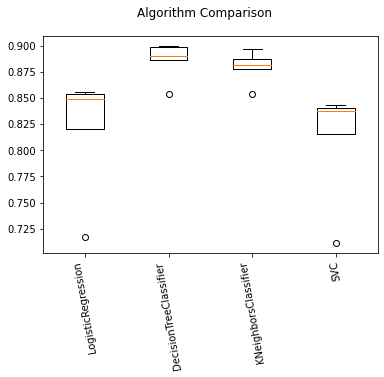

In [330]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
kfold=10
for name, model in models:
    cv_results = cross_val_score(model, X, y, cv=5, scoring='accuracy')
   
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    print("%s:" % cv_results)
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
ax.tick_params(axis='x', labelrotation = 100)
plt.savefig("images/algorithmcomparision")
plt.show()

Conclusion: Decison Tree is the best model for Portuguese bank direct marketing data mining project

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

2nd attempt at comparing Models by tweaking parameter and using othe hyperparameters

In [331]:
# Define the search space for Decision Tree
dec_tree_params ={'max_depth': [1,2, 3, 4, 5, 6, 7, 8, 9, 10],
         'min_samples_split': [0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50],
          'criterion': ['gini', 'entropy'],
          'min_samples_leaf': [1,2, 3, 4, 5, 6, 7, 8, 9, 10],
         }

# Define the search space for KNN

knn_params = {'model__kernel': ['rbf', 'poly', 'linear', 'sigmoid'],'gamma': [0.1, 1.0, 10.0, 100.0]}

# Define the search space for SVM

svm_params =  {
    'model__kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}



Decision Tree Model

In [332]:
%%time
# Grid search for Decision Tree this is model is too slow please uncomment and run to see in action 
start_time = time.time()
#grid_GridSearchCV = GridSearchCV(DecisionTreeClassifier(random_state = 42), param_grid=dec_tree_params).fit(X_train, y_train)
#end_time = time.time()
#train_time = end_time - start_time
#train_accuracy = grid_GridSearchCV.score(X_train, y_train)
#test_accuracy = grid_GridSearchCV.score(X_test, y_test)
#grid_GridSearchCV_best_params = grid_GridSearchCV.best_params_
#print(f'GridSearchCV Training Accuracy: {train_accuracy: .2f}')
#print(f'GridSearchCV Test Accuracy: {test_accuracy: .2f}')
#print(f'GridSearchCV Best parameters of tree: {grid_GridSearchCV_best_params}')




CPU times: total: 0 ns
Wall time: 0 ns


In [333]:
%%time
start_time = time.time()
#dec_tree_model = DecisionTreeClassifier(random_state=42)
dec_tree_model.fit(X_train, y_train)
end_time = time.time()
train_time = end_time - start_time

train_accuracy = dec_tree_model.score(X_train, y_train)
test_accuracy = dec_tree_model.score(X_test, y_test)
print("Train accuracy: {:.2f}".format(train_accuracy))
print("Test accuracy: {:.2f}".format(test_accuracy))

dec_tree_model_results = pd.DataFrame({'Name': ['Decision Tree'], 'Train Time': [train_time], 'Train Accuracy': [train_accuracy], 'Test Accuracy': [test_accuracy]})
results_df = pd.concat([results_df, dec_tree_model_results])

Train accuracy: 1.00
Test accuracy: 0.86
CPU times: total: 109 ms
Wall time: 107 ms


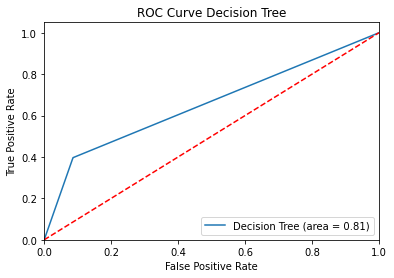

Decision Tree  AUC Score: 0.66


In [334]:
#AUC ROC curve  for LogRegModel
logit_roc_auc = roc_auc_score(y_test,y_pred)
fpr, tpr, thresholds = roc_curve(y_test, dec_tree_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Decision Tree')
plt.legend(loc="lower right")
plt.savefig('images/Log_ROC_DecisionTree')
plt.show()
auc_score =roc_auc_score(y_test, dec_tree_model.predict_proba(X_test)[:,1])
print("Decision Tree  AUC Score: {:.2f}".format(auc_score))

KNN Model

In [335]:
 %%time
 from sklearn.model_selection import cross_val_score

# Fit and time the KNN model

start_time = time.time()
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8844502066283121
CPU times: total: 781 ms
Wall time: 795 ms


In [336]:
#Using Cross Validation to Get the Best Value of k
k_values = [i for i in range (1,31)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))

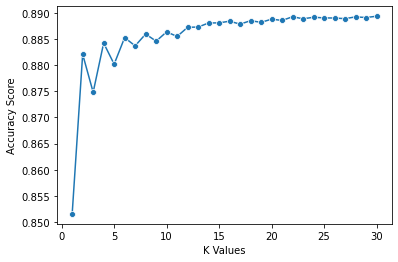

In [337]:
#We can plot the results with the following code
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")
plt.savefig('images/KValues')

In [338]:
 %%time
#We can now train our model using the best k value using the code below.
best_index = np.argmax(scores)
best_k = k_values[best_index]
start_time = time.time()
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
end_time = time.time()
train_time = end_time - start_time
train_accuracy = knn.score(X_train, y_train)
test_accuracy = knn.score(X_test, y_test)
print("Train accuracy: {:.2f}".format(train_accuracy))
print("Test accuracy: {:.2f}".format(test_accuracy))
knn_results = pd.DataFrame({'Name': ['KNN'], 'Train Time': [train_time], 'Train Accuracy': [train_accuracy], 'Test Accuracy': [test_accuracy]})
results_df = pd.concat([results_df, knn_results])


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Train accuracy: 0.90
Test accuracy: 0.89
Accuracy: 0.893444615509278
Precision: 0.582089552238806
Recall: 0.1961206896551724
CPU times: total: 4.59 s
Wall time: 4.62 s


[[  273  1119]
 [  196 10753]]


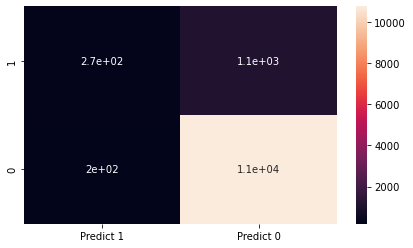

In [339]:
ConfMat=confusion_matrix(y_test, y_pred, labels=[1, 0])
print (ConfMat)

ConfMat_DF = pd.DataFrame(ConfMat, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,4))
sns.heatmap(ConfMat_DF, annot=True )
plt.savefig('images/conf1')

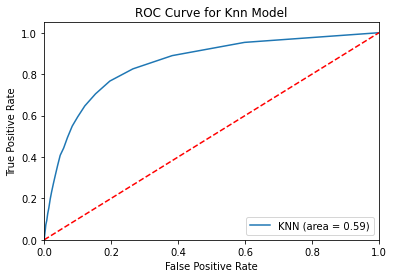

KNN AUC Score: 0.8505980050663315


In [340]:
knn_roc_auc = roc_auc_score(y_test,y_pred)
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Knn Model')
plt.legend(loc="lower right")
plt.savefig('images/Log_ROC_KNN')
plt.show()
auc_score = roc_auc_score(y_test, knn.predict_proba(X_test)[:,1])
print("KNN AUC Score:",auc_score)

SVC Model

In [341]:
 %%time
# Fit and time the SVM model

start_time = time.time()
svc=SVC(C= .1, kernel='rbf', gamma= 'auto',probability=True)
svc.fit(X_train, y_train)
end_time = time.time()
train_time = end_time - start_time
y_pred = svc.predict(X_test)
train_accuracy = svc.score(X_train, y_train)
test_accuracy = svc.score(X_test, y_test)
print("Train accuracy: {:.2f}".format(train_accuracy))
print("Test accuracy: {:.2f}".format(test_accuracy))
svc_results = pd.DataFrame({'Name': ['SVC'], 'Train Time': [train_time], 'Train Accuracy': [train_accuracy], 'Test Accuracy': [test_accuracy]})
results_df = pd.concat([results_df, svc_results], ignore_index=False)

[[    1  1391]
 [    1 10948]]


<AxesSubplot:>

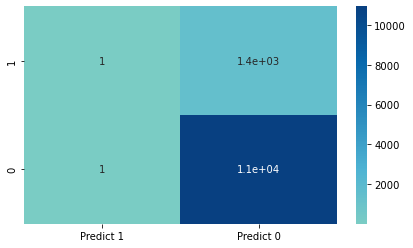

In [ ]:
ConfMat=confusion_matrix(y_test, y_pred, labels=[1, 0])
print (ConfMat)

ConfMat_DF = pd.DataFrame(ConfMat, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,4))
sns.heatmap(ConfMat_DF, annot=True, cmap='GnBu',center=0 )
plt.savefig('images/conf2')

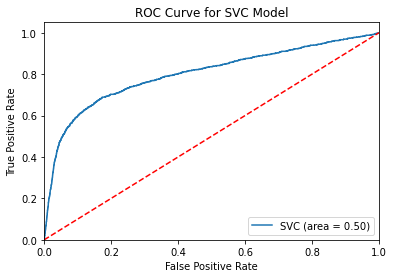

KNN AUC Score: 0.8009158908649612


In [ ]:
svc_roc_auc = roc_auc_score(y_test,y_pred)
fpr, tpr, thresholds = roc_curve(y_test, svc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='SVC (area = %0.2f)' % svc_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVC Model')
plt.legend(loc="lower right")
plt.savefig('images/KNN_ROCSVC')
plt.show()
auc_score = roc_auc_score(y_test, svc.predict_proba(X_test)[:,1])
print("KNN AUC Score:",auc_score)

Model Result Comparision

In [ ]:
results_df

,Train Time,Train Accuracy,Test Accuracy
Name,,,
Logistic Regression,0.283658,0.902619,0.901548
Decision Tree,0.082997,0.999826,0.855684
KNN,0.977025,0.899215,0.893445
SVC,148.595623,0.887372,0.887205


In [ ]:
# Reset the index
results_df.reset_index(inplace=True)
# Set the index to be the 'Name' column
results_df.set_index('Name', inplace=True)

# Set bar width and positions
bar_width = 0.35
bar_positions = np.arange(len(results_df))

# Create the side-by-side bar plots for Train Accuracy and Test Accuracy
ax = results_df['Train Accuracy'].plot(kind='bar', width=bar_width, position=1, label='Train Accuracy')
results_df['Test Accuracy'].plot(kind='line', width=bar_width, position=0, color='red', label='Test Accuracy', ax=ax)

# Set labels
plt.xlabel('Model')
plt.ylabel('Accuracy')

# Set x-axis ticks and labels
plt.xticks(bar_positions, results_df.index, rotation=45)

# Add title
plt.title('Model Performance Comparison')

# Display the 'Train Time' as a number on top of the 'Train Accuracy' bar
for idx, value in enumerate(results_df['Train Time']):
    ax.text(idx - 0.15, results_df['Train Accuracy'][idx] + 0.01, f'{value:.2f}s', fontsize=9)

# Display the legend outside the plot area
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Display the plot
plt.show()
plt.savefig('images/algobar')

KeyError: "None of ['Name'] are in the columns"

Concusion: Decison Tree is the best model for Portuguese bank direct marketing data mining project followed by Logistic Regression.


##### Questions
It would be worth while to try other model I learnt in this course, due to lack of time I couldn't explore it. 